# Text Mining - Práctica

## Afi - Máster en Data Science, Big Data e Inteligencia Artificial

**Por: Manuela Larrea Gómez**

Fecha: Junio 2024

<hr>

Paquetes requeridos

In [ ]:
!pip install nltk deep-translator
!python -m spacy download es_core_news_sm

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tag import pos_tag


nltk.download('punkt')
nltk.download('stopwords')

import spacy

from deep_translator import GoogleTranslator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manu-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### EJERCICIO 1 Fechas

Vamos a crear expresiones regulares que nos permitan detectar dentro de un texto fechas en distintos formatos.

In [3]:
# 1.1 Construye una regex que se active con el siguiente formato dd-mm-yy (e.g. 30-03-20)
regex_1_1 = r'\b\d{2}-\d{2}-\d{2}\b'

Ahora, probemosla:

In [4]:
text = "Esta práctica se entrega el 09-06-24 y es importante."
matches = re.findall(regex_1_1, text)
print(matches)  # Output: ['09-07-24']

['09-06-24']


In [5]:
# 1.2 A veces, como separador en vez de - se utiliza /. Modifica la regex anterior para que también se active con el siguiente formato:
# dd/mm/yy (e.g. 30/03/20)
# Ojo, debe activarse también con el formato de la celda anterior.
regex_1_2 = r'\b\d{2}[-/]\d{2}[-/]\d{2}\b'

Ahora, probémosla:

In [6]:
text = "Afi Alumni es el 13-06-24 y el master acaba el 16/06/24."
matches = re.findall(regex_1_2, text)
print(matches)  # Output: ['13-06-24', '16/06/24']

['13-06-24', '16/06/24']


In [7]:
# 1.3 Has llegado hasta aquí pero tú también sabes que no siempre se añade el 0 a los meses que van de enero a septiembre.
# Modifica tu regex para que tenga en cuenta esto. (e.g. 30/3/20)
# Ojo, debe activarse también con el formato de las celdas anteriores.
regex_1_3 = r'\b\d{2}[-/](?:0?[1-9]|1[0-2])[-/]\d{2}\b'

Ahora, probémosla:

In [8]:
text = "Las fechas importantes de este mes son 13-06-24, 16/6/24 y 29-6-24."
matches = re.findall(regex_1_3, text)
print(matches)  # Output: ['13-06-24', '16/6/24' y '29-6-24']

['13-06-24', '16/6/24', '29-6-24']


### EJERCICIO 2 Emails

La expresión regular construida tiene en cuenta los requisitos definidos por estos documentos:

**_Local-part:_**

Según RFC 5322 (https://datatracker.ietf.org/doc/html/rfc5322), el local-part puede contener letras (a-z, A-Z), dígitos (0-9), y caracteres especiales (! # $ % & ' * + - / = ? ^ _ { | } ~`), pero para simplificación y compatibilidad, a menudo se permite solo un subconjunto más común (letras, números, puntos, guiones, guiones bajos y signos más).


**_Domain:_**

Según RFC 1035 (https://datatracker.ietf.org/doc/html/rfc1035) y RFC 5322, el domain debe seguir el formato de nombres de dominio válidos, que incluye letras, dígitos y guiones. Los nombres de dominio también pueden tener subdominios separados por puntos.

La extensión del dominio debe tener al menos dos caracteres alfabéticos (para incluir dominios comunes como .com, .org, .net).

In [9]:
# Construye una regex que compruebe que una cadena cumple los requisitos para ser una dirección de email.
regex_email = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

Ahora, probémosla:

In [10]:
emails = [
    "manuscula.ai@example.com",
    "manu.manu+larrea+gomez@example.com",
    "manuela-larrea@example.co.uk",
    "manu@subdomain.example.com",
    "invalid-email@",
    "another.invalid@.com",
    "yet.another@invalid@domain.com",
]

for email in emails:
    match = re.match(regex_email, email)
    print(f"{email}: {'Valid' if match else 'Invalid'}")

manuscula.ai@example.com: Valid
manu.manu+larrea+gomez@example.com: Valid
manuela-larrea@example.co.uk: Valid
manu@subdomain.example.com: Valid
invalid-email@: Invalid
another.invalid@.com: Invalid
yet.another@invalid@domain.com: Invalid


### EJERCICIO 3 Analizador de textos

Prepara una secuencia de celdas que te sirva para hacer un análisis del texto o los textos que elijas.

Puedes utilizar alguno de los ya incluídos en los paquetes o incluir alguno que encuentres por tu cuenta. En ese caso no te olvides de incluirlo(s) en la entrega de la práctica.

Puedes elegir si lo haces sobre textos en español o en ingles.

Utiliza las funciones vistas en clase e incluye una celda de texto explicando las conclusiones que sacas de los resultados.

Recuerda lo dicho en clase, más vale pocas cosas pero relevantes que aplicar todo lo visto en clase sin motivo.

**_Solución_**

Siempre me he preguntado qué de especial tuvo la arenga de Alejandro Magno durante su campaña a India, ya que (un poco de contexto) sus tropas estaban muy cansadas y desmotivadas y lo cuestionaban por querer continuar la marcha. Es muy increíble pensar que sus tropas le cuestionaron su liderazgo, teniendo en cuenta que para ese punto Alejandro Magno YA ERA uno de los conquistadores más grandes de la historia ... veamos:

Según la teoría de discursos, un discurso motivacional eficaz debe:

1. Reconocer los Logros Pasados: Recordar a la audiencia sus éxitos previos para fomentar un sentido de orgullo y capacidad.

2. Proveer una Visión de Futuro: Ofrecer una imagen clara y positiva del futuro que inspire y motive.

3. Apelar a Emociones: Utilizar una mezcla de emociones para conectar con la audiencia a un nivel personal.

4. Establecer una Relación de Confianza: Mostrar que el orador comparte los mismos riesgos y recompensas que la audiencia.

Fuente:  https://pressbooks.ulib.csuohio.edu/csu-fyw-rhetoric/chapter/rhetorical-strategies-building-compelling-arguments/

Veamos si con NLP podemos ver donde radicó el éxito de Alejandro Magno

Leemos y cargamos los datos

In [11]:
with open('./data/Alex_Magnus.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
text = text.replace("\n", ' ')
text = text.replace("\ufeff", '')
text = text.replace("—", ' ')

Tokenizamos

In [12]:
tokens = word_tokenize(text.lower())

Eliminamos las stopwords para hacer un analisis de frecuencia de palabras

In [13]:
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

Las más frecuenctes son:

In [14]:
word_counts = Counter(filtered_tokens)
common_words = word_counts.most_common(10)
common_words

[('si', 9),
 ('ser', 5),
 ('aliados', 4),
 ('griegos', 4),
 ('sometido', 4),
 ('allá', 4),
 ('río', 4),
 ('macedonios', 3),
 ('libia', 3),
 ('así', 3)]

Ahora, veamos cuales son los sustantivos más frecuentes:

In [15]:
# Descargamos el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Procesamos el texto con spaCy
doc = nlp(text.lower())

Filtramos los sustantivos

In [16]:
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

Veamos los más frecuentes

In [17]:
noun_counts = Counter(nouns)
common_nouns = noun_counts.most_common(20)
common_nouns

[('vosotros', 6),
 ('tierra', 4),
 ('río', 4),
 ('macedonios', 3),
 ('aliados', 3),
 ('parte', 3),
 ('naciones', 3),
 ('hircania', 3),
 ('mar', 3),
 ('tierras', 3),
 ('trabajos', 3),
 ('océano', 3),
 ('golfo', 3),
 ('penalidades', 2),
 ('país', 2),
 ('hífasis', 2),
 ('imperio', 2),
 ('macedonia', 2),
 ('esfuerzos', 2),
 ('límites', 2)]

Veamoslo en una wordcloud

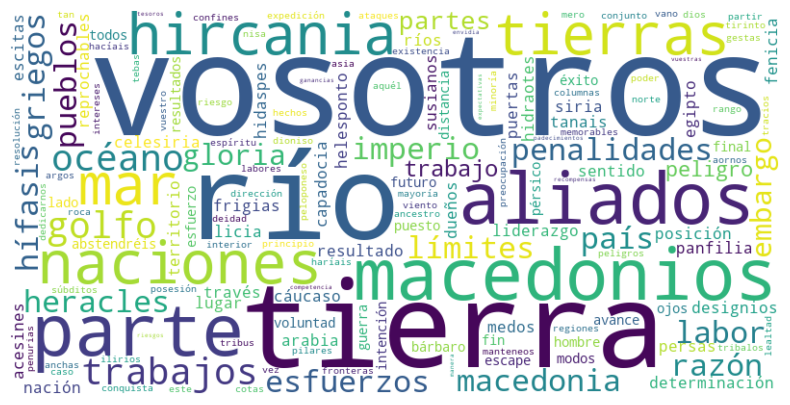

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(noun_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Estas palabras subrayan la narrativa de conquista y la llamada a la acción. "Si" y "ser" indican una estructura condicional y reflexiva, mientras que "aliados", "griegos" y "macedonios" destacan la composición de diversas etnias y culturas del ejército.

Un poco de contexto histórico: El ejército de Alejandro era un resultado obvio de sus conquistas y expansiones territoriales. Si bien su núcleo estaba compuesto por Macedonios, tenia un montón de soldados de otros sitios:

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <title>Composición del Ejército de Alejandro Magno</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        table, th, td {
            border: 1px solid black;
        }
        th, td {
            padding: 15px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>


<table>
    <tr>
        <th>Grupo</th>
        <th>Origen</th>
        <th>Rol</th>
    </tr>
    <tr>
        <td>Griegos</td>
        <td>Ciudades-estado griegas como Atenas, Esparta, y Tebas</td>
        <td>Unidades de infantería y tropas auxiliares</td>
    </tr>
    <tr>
        <td>Tracios e Ilirios</td>
        <td>Regiones del noreste de Grecia y la península balcánica</td>
        <td>Infantería ligera y tropas de choque</td>
    </tr>
    <tr>
        <td>Persas y otros asiáticos</td>
        <td>Territorios conquistados en el Imperio Persa, incluyendo Persia, Media, Bactria, y Sogdiana</td>
        <td>Integrados progresivamente en el ejército de Alejandro como infantería y caballería</td>
    </tr>
    <tr>
        <td>Egipcios y otros pueblos del norte de África</td>
        <td>Egipto y Libia helénica</td>
        <td>Tropas auxiliares y arqueros</td>
    </tr>
</table>

</body>
</html>



Ahora, veamos el ciclo de vida de estos sustantivos en todo el discurso

In [239]:
most_common_nouns = [word for word, count in common_nouns[:5]]
dispersion = {word: [i for i, token in enumerate(tokens) if token == word] for word in most_common_nouns}

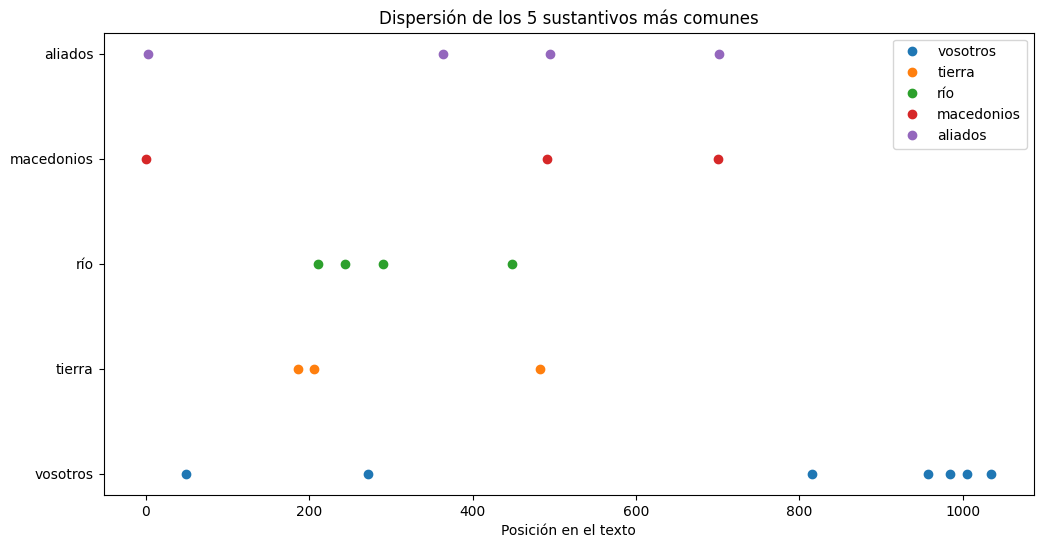

In [240]:
plt.figure(figsize=(12, 6))
for word, indices in dispersion.items():
    plt.plot(indices, [word] * len(indices), 'o', label=word)
plt.yticks(range(len(most_common_nouns)), most_common_nouns)
plt.legend(loc='upper right')
plt.title("Dispersión de los 5 sustantivos más comunes")
plt.xlabel("Posición en el texto")
plt.show()

Ahora veamos el "sentimiento". Para esto definiré una lista de palabras "positivas" y otra de palabras "negativas". 

Me crearé estas listas manualmente con las palabras más frecuentes que calculamos anteriormente, porque no dispongo de un diccionario de palabras positivas y negativas en español. En términos generales, lo que buscaré con estas listas será representar una seleccion de términos que podrían estar presentes en el discruso y que tinenen connotaciones claramente positivas o negativas:

In [21]:
positive_words = ['gloria', 'éxito', 'valiente', 'firme', 'recompensa']
negative_words = ['penalidades', 'temer', 'reprochable']

# Calculamos la frecuencia de estas palabras
word_freq = Counter(filtered_tokens)

Ahora me inventaré un puntaje. Básicamente lo que haré será calcular la cantidad de palabras positivas y negativas en el discurso sumando las freciencias de las palabras que aparecen en las listas que creé anteriormente. Luego crear;e un diccionario sentimen_scores para almacenar esos conteos y calcular un puntaje neto (net) de "sentimiento"

In [22]:
positive_count = sum(word_freq[word] for word in positive_words if word in word_freq)
negative_count = sum(word_freq[word] for word in negative_words if word in word_freq)

sentiment_scores = {
    'positive': positive_count,
    'negative': negative_count,
    'net': positive_count - negative_count
}

También podría ser interesante ver cuáles son las palabras que más aparecen juntas en el discruso para entender posibles relaciones entre términos. 

Para esto calculare la frecuencia  con la que aparecen juntas las palabras en una ventana de dos palabras. 

In [23]:
co_occurrence = Counter()
window_size = 2

for i in range(len(filtered_tokens) - window_size):
    word_pair = tuple(filtered_tokens[i:i + window_size])
    co_occurrence[word_pair] += 1

In [24]:
sentiment_scores

{'positive': 5, 'negative': 3, 'net': 2}

El resultado sugiere un balance ligeramente positivo, adecuado para un discurso motivacional que busca inspirar a las tropas al enfocarse en la "gloria" y minimizar las "penalidades".

In [25]:
co_occurrence.most_common(20)

[(('macedonios', 'aliados'), 3),
 (('aliados', 'griegos'), 3),
 (('tierra', 'allá'), 2),
 (('mar', 'hircano'), 2),
 (('si', 'volvemos'), 2),
 (('griegos', 'ver'), 1),
 (('ver', 'seguís'), 1),
 (('seguís', 'designios'), 1),
 (('designios', 'arriesgados'), 1),
 (('arriesgados', 'determinación'), 1),
 (('determinación', 'igual'), 1),
 (('igual', 'animaba'), 1),
 (('animaba', 'reunido'), 1),
 (('reunido', 'mismo'), 1),
 (('mismo', 'lugar'), 1),
 (('lugar', 'ver'), 1),
 (('ver', 'si'), 1),
 (('si', 'puedo'), 1),
 (('puedo', 'persuadir'), 1),
 (('persuadir', 'continuar'), 1)]

Las co-ocurrencias en el discurso destacan el fomento de la unidad, con frecuentes menciones de "macedonios" y "aliados griegos" que subrayan la importancia de la cohesión en su ejército dirverso. 

El enfoque en la expansión territorial, utilizando términos como "tierra" y "allá", refuerza la visión ambiciosa de nuevas conquistas e inspira a las tropas con la promesa de gloria. Además, Alejandro emplea estructuras condicionales, como "si volvemos", para contrastar las consecuencias de regresar con los beneficios de continuar, persuadiendo a las tropas de seguir adelante. 

Las demas co ocurrencias ya no tienen frecuencia superior de 1, pero resultan interesantes, como las frases que conectan la determinación y la valentía con "designios arriesgados"

Ahora veamoslo todo en conjunto para concluir

In [26]:
{
    'common_words': common_words,
    'common_nouns': common_nouns,
    'sentiment_scores': sentiment_scores,
    'co_occurrence': co_occurrence.most_common(10)
}


{'common_words': [('si', 9),
  ('ser', 5),
  ('aliados', 4),
  ('griegos', 4),
  ('sometido', 4),
  ('allá', 4),
  ('río', 4),
  ('macedonios', 3),
  ('libia', 3),
  ('así', 3)],
 'common_nouns': [('vosotros', 6),
  ('tierra', 4),
  ('río', 4),
  ('macedonios', 3),
  ('aliados', 3),
  ('parte', 3),
  ('naciones', 3),
  ('hircania', 3),
  ('mar', 3),
  ('tierras', 3),
  ('trabajos', 3),
  ('océano', 3),
  ('golfo', 3),
  ('penalidades', 2),
  ('país', 2),
  ('hífasis', 2),
  ('imperio', 2),
  ('macedonia', 2),
  ('esfuerzos', 2),
  ('límites', 2)],
 'sentiment_scores': {'positive': 5, 'negative': 3, 'net': 2},
 'co_occurrence': [(('macedonios', 'aliados'), 3),
  (('aliados', 'griegos'), 3),
  (('tierra', 'allá'), 2),
  (('mar', 'hircano'), 2),
  (('si', 'volvemos'), 2),
  (('griegos', 'ver'), 1),
  (('ver', 'seguís'), 1),
  (('seguís', 'designios'), 1),
  (('designios', 'arriesgados'), 1),
  (('arriesgados', 'determinación'), 1)]}

**Estructura Inclusiva:** El uso frecuente de "vosotros" y referencias directas a los soldados crea un tono inclusivo y personal, esencial para conectar emocionalmente con la tropa. Alejandro apela a su sentido de pertenencia y responsabilidad compartida.

**Enfoque en la Conquista y la Expansión:** La repetición de términos relacionados con la geografía ("tierra", "río") y la expansión ("más allá") subraya la narrativa de la conquista continua, inspirando a los soldados con la promesa de nuevas tierras y gloria.

**Unidad Multinacional:** La mención de diferentes grupos étnicos ("macedonios", "aliados", "griegos") destaca la necesidad de mantener la unidad entre las diversas fuerzas, sin duda esto desmotivó la rebelión que Alejandro sentía en las narices. Fue crucial para el éxito de sus campañas.

**Balance Emocional:** El análisis de sentimientos muestra un balance ligeramente positivo, adecuado para un discurso motivacional que busca elevar la moral de las tropas. Alejandro enfatiza los logros y minimiza las dificultades, manteniendo un tono de esperanza y ambición.


Pero bueno... un leve disclaimer: Este discurso le funcionó a Alejandro en el corto plazo, porque las tropas continuaron la marcha un poco más, pero finalmente, la resistencia y la fatiga prevalecieron. Las tropas se revelaron en el río Hífasis y lo forzaron a regresar a Babilonia...

Aquí sin duda la conclusión más directa es que las promesas de gloria de Alejandro solo sirvieron para el impulso inicial y momentáneo  ("vosotros", "gloria", "tierra"), pero no lograron sostener la moral en condiciones extremas... Un poco de descanso quizá no lo habría forzado a regresar a Babilonia. 

### EJERCICIO 4 Traductor años 90

1. Utiliza las funcionalidades vistas en clase para crear un traductor palabra a palabra.

    El resultado debe ser la traducción al inglés de la siguiente historia

    "indio querer hablar vaquero"

    "vaquero disparar"

    "vaquero hombre malo"

2. Ahora me gustaría saber como quedaría esta historia en japonés.

    En las traspas tienes información importante sobre cómo hacerlo.

    Pista: quizás debas dar un rodeo.

In [27]:
def translate_word_by_word(text, source_lang='es', target_lang='en'):
    # Tokenizar el texto en palabras
    words = word_tokenize(text, language='spanish')
    
    # Traducir cada palabra individualmente
    translated_words = [GoogleTranslator(source=source_lang, target=target_lang).translate(word) for word in words]
    
    # Volver a unir las palabras traducidas en una sola cadena
    translated_text = ' '.join(translated_words)
    return translated_text

Ahora, probémoslo

In [28]:
phrases = [
    "indio querer hablar vaquero",
    "vaquero disparar",
    "vaquero hombre malo"
]

translated_phrases = [translate_word_by_word(phrase) for phrase in phrases]

In [29]:
for original, translated in zip(phrases, translated_phrases):
    print(f"Original: {original}")
    print(f"Traducido: {translated}")
    print()

Original: indio querer hablar vaquero
Traducido: Indian want talk cowboy

Original: vaquero disparar
Traducido: cowboy shoot

Original: vaquero hombre malo
Traducido: cowboy man bad



Ahora, en japonés...

Con este punto solo pienso en: Desarrollo incremental y escalabilidad. Así que aplicaré POO (programacion orientada a objetos). 

Nota: No eliminare el desarrollo anterior, para explicitar la necesidad de implementar la logica POO cuando se quiere hacer un producto extensible que soporte la traducción a diferentes idiomas

In [30]:
class WordByWordTranslator:
    def __init__(self, source_lang='es', target_lang='en'):
        self.source_lang = source_lang
        self.target_lang = target_lang

    def set_target_language(self, target_lang):
        self.target_lang = target_lang

    def translate(self, text):
        words = word_tokenize(text, language='spanish')
        translated_words = [GoogleTranslator(source=self.source_lang, target=self.target_lang).translate(word) for word in words]
        translated_text = ' '.join(translated_words)
        return translated_text

In [31]:
translator = WordByWordTranslator()

Ahora, probémoslo:

In [32]:
# Traduzco las frases a inglés
print("Traducción al inglés:")
for phrase in phrases:
    print(f"Original: {phrase}")
    print(f"Traducido: {translator.translate(phrase)}")
    print()

# Cambio el idioma de destino a japonés y traduzco nuevamente
translator.set_target_language('ja')
print("Traducción al japonés:")
for phrase in phrases:
    print(f"Original: {phrase}")
    print(f"Traducido: {translator.translate(phrase)}")
    print()

Traducción al inglés:
Original: indio querer hablar vaquero
Traducido: Indian want talk cowboy

Original: vaquero disparar
Traducido: cowboy shoot

Original: vaquero hombre malo
Traducido: cowboy man bad

Traducción al japonés:
Original: indio querer hablar vaquero
Traducido: インド人 欲しい 話す カウボーイ

Original: vaquero disparar
Traducido: カウボーイ シュート

Original: vaquero hombre malo
Traducido: カウボーイ 男 悪い



### EJERCICIO 5 Clasificador textos

Modifica el código visto en clase (6 Clasificación Textos) para solucionar los dos problemas que encontramos. De cara a la entrega, crea una copia del fichero, modificalo y envíalo en la práctica. Comprueba que el fichero entero funciona correctamente antes de enviarlo.

1. Adapta las funciones correspondientes para que a la hora de vectorizar si encontramos una palabra que no está en el vocabulario no se lance un error.

2. Adapta las funciones o añade alguna nueva para que los textos a los que queremos asignar un sentimiento se preprocesen de forma correcta.

**_Solución:_**

### 1. Carga de datos

In [48]:
## Críticas de películas
g = open('data/reviews.txt','r') 
reviews = g.read().splitlines()
g.close()

## Sentimiento asociado
g = open('data//labels.txt','r') # What we WANT to know!
labels = g.read().upper().splitlines()
g.close()

In [49]:
len(reviews)

25000

In [50]:
reviews[1]

'story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it  s singers . unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting . even those from the era should be turned off . the cryptic dialogue would make shakespeare seem easy to a third grader . on a technical level it  s better than you might think with some good cinematography by future great vilmos zsigmond . future stars sally kirkland and frederic forrest can be seen briefly .  '

In [51]:
len(labels)

25000

In [52]:
labels[1]

'NEGATIVE'

In [53]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

In [54]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


### 2. Análisis cuantitativo términos: ¿Qué términos aparecen en los comentarios positivos, cuales en los negativos y cuales aparecen en ambos?

Vamos a utilizar la estructura Counter de python para ver cuantas veces aparece cada palabra en las críticas. Debajo tienes un ejemplo de como utilizar un contador.

https://docs.python.org/2/library/collections.html#collections.Counter

In [192]:
ex_count = Counter()
ex_count['palabra1'] = 3
ex_count['palabra2'] = 5
ex_count.most_common()

[('palabra2', 5), ('palabra1', 3)]

In [193]:
# Un contandor para cada tipo de review y uno total
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [194]:
# Crea un bucle que, para cada crítica, recorra sus palabras una a una e incremente en 1 el número de aparaciones.
# Aumenta el contador siempre en total_counts y en positive_counts O en negative_counts dependiendo de si es una crítica
# positiva o negativa

for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [195]:
positive_counts.most_common(10)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235)]

In [196]:
negative_counts.most_common(10)

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327)]

In [197]:
total_counts.most_common(10)

[('', 1111930),
 ('the', 336713),
 ('.', 327192),
 ('and', 164107),
 ('a', 163009),
 ('of', 145864),
 ('to', 135720),
 ('is', 107328),
 ('br', 101872),
 ('it', 96352)]

El resultado del conteo muestra que las stopwords están presentes tanto en críticas positivas como en críticas negativas y pueden añadir ruido a la hora crear un modelo de clasificación. ¿Cómo podemos sacar aquellas palabras que son un indicador claro de que se trata de una crítica positiva o negativa?

### 3. Análisis cuantitativo términos: Ratios

Vamos a calcular los ratios de aparición de los términos de la siguiente manera: ratio = positive_counts/float(negative_counts + 1).

**Nota**: vamos a trabajar unicamente con aquellos términos que **en total** aparecen 101 o más veces.

*   ¿Por qué ese +1 en el denominador?
*   A bote pronto, ¿cómo interpretaríamos los resultados? ¿En qué rango se van a mover los ratios?



In [198]:
pos_neg_ratios = Counter()

# Calcula el ratio para los término más comunes
for term, cnt in total_counts.most_common():
    if cnt > 100:
        pos_neg_ratio = positive_counts[term] / (negative_counts[term] + 1)
        pos_neg_ratios[term] = pos_neg_ratio


In [199]:
pos_neg_ratios.most_common(15)

[('edie', 109.0),
 ('paulie', 59.0),
 ('felix', 23.4),
 ('polanski', 16.833333333333332),
 ('matthau', 16.555555555555557),
 ('victoria', 14.6),
 ('mildred', 13.5),
 ('gandhi', 12.666666666666666),
 ('flawless', 11.6),
 ('superbly', 9.583333333333334),
 ('perfection', 8.666666666666666),
 ('astaire', 8.5),
 ('captures', 7.68),
 ('voight', 7.615384615384615),
 ('wonderfully', 7.552631578947368)]

In [200]:
## Algunos ejemplos que nos ayudan a interpretar los resultados
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0607993145235326
Pos-to-neg ratio for 'amazing' = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


¿Qué problema tiene esta definición de ratio? ¿Cómo lo solucionamos?

### 4. Análisis cuantitativo términos: Logaritmos

Al aplicar logaritmos a los valores calculados en el apartado anterior hacemos que los valores por debajo de 1 pasen a ser negativos (y con valor absoluto más alto cuanto más cercanos a 0 sean) y además conseguimos que dos términos con frecuencias relativas parecidas pero en críticas de signo distinto tomen valores con valor absoluto parecido y signo contrario.

In [201]:
# Calcula el logaritmo de los ratios para todos los términos
for term,ratio in list(pos_neg_ratios.most_common()):
    pos_neg_ratios[term] = np.log(ratio)

In [202]:
pos_neg_ratios.most_common(15)

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353)]

In [203]:
## Algunos ejemplos que nos ayudan a interpretar los resultados
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 0.05902269426102881
Pos-to-neg ratio for 'amazing' = 1.3919815802404802
Pos-to-neg ratio for 'terrible' = -1.7291085042663878


In [204]:
pos_neg_ratios.most_common()[:-31:-1]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

### 5. Modelo de clasificación basado en bag of words

Vamos a aplicar la técnica de bag of words paso a paso a cada una de las críticas con el objetivo de convertirlas en vectores numéricos que sirvan de features de un nuestro modelo.

### Primer paso: construir el conjunto de palabras de nuestros vocabulario.

In [205]:
vocab = set(total_counts.keys())

In [206]:
vocab_size = len(vocab)
vocab_size

74074

#### Segundo paso: construímos un vector del tamaño de nuestro vocabulario. Para ganar tiempo lo creamos como un vector entero de 0s usando la función de numpy zeros()

In [207]:
zeros = np.zeros(vocab_size)

In [208]:
zeros

array([0., 0., 0., ..., 0., 0., 0.])

#### Tercer paso: asignar a cada palabra un índice del vector y crear una tabla maestra que guarde esta relación y nos permita crear fácilmente nuestros vectores.

In [211]:
# Creamos un diccionario que tiene como key la palabra y como valor el índice asociado
word2index = {}
for i,word in enumerate(vocab):
    word2index[word.lower()] = i
    
word2index

{'': 0,
 'hazelhurst': 1,
 'perce': 2,
 'witching': 3,
 'savingtheday': 4,
 'outweight': 5,
 'staten': 6,
 'rename': 7,
 'incisive': 8,
 'builder': 9,
 'column': 10,
 'symbiont': 11,
 'mil': 12,
 'isabell': 13,
 'leroi': 14,
 'todays': 15,
 'sniffles': 16,
 'liberal': 17,
 'dod': 18,
 'griswald': 19,
 'clinging': 20,
 'dunnno': 21,
 'rietman': 22,
 'mohammad': 23,
 'landing': 24,
 'toasted': 25,
 'bonhomie': 26,
 'carnivals': 27,
 'infect': 28,
 'despicably': 29,
 'kukuanaland': 30,
 'fightfest': 31,
 'collaborating': 32,
 'augmenting': 33,
 'whoah': 34,
 'synonym': 35,
 'uschi': 36,
 'sandrine': 37,
 'lambert': 38,
 'imparting': 39,
 'sovereignty': 40,
 'drablow': 41,
 'picky': 42,
 'blackest': 43,
 'landsman': 44,
 'partes': 45,
 'toshikazu': 46,
 'transcription': 47,
 'impressible': 48,
 'caesar': 49,
 'ably': 50,
 'druid': 51,
 'meaty': 52,
 'scathed': 53,
 'woodcuts': 54,
 'babcock': 55,
 'doritos': 56,
 'beliveable': 57,
 'disassembled': 58,
 'closely': 59,
 'gaspar': 60,
 'drake

#### Cuarto paso: crear la función que dada una crítica devuelve un vector contando la frecuencia de las palabras utilizadas.

In [173]:
import warnings

In [212]:
## Rellena la función que para crítica devuelve el vector asociado aplicando bag of words
def bag_of_words(review):
    v = np.zeros(vocab_size)

    for word in review.split(" "):
        word = word.lower()
        if word in word2index:
            v[word2index[word]] += 1
        else:
            import warnings
            msg = f"""La palabra {word} no se encuentra en el diccionario construido durante el 
            entrenamiento. La vectorización de la frase se construye sin tener en cuenta la 
            existencia de esta palabra"""            
            warnings.warn(msg)
    return v

In [213]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [217]:
word2index[""]

0

#### Quinto paso: el target de nuestro modelo serán 1s y 0s. Vamos a crear una función que convierta los cadenas POSITIVE y NEGATIVE a 1 y 0.

In [215]:
## Rellena la función para que dada la etiqueta en forma de cadena devuelve el entero asociado
def target_numerico(label):
    return 1  if label == 'POSITIVE'else 0

In [216]:
target_numerico(labels[0])

1

#### Sexto paso: dividimos los datos que tenemos en train y test (esta vez lo hacemos a ojo).

In [218]:
training_size = 5000
test_size = 10000
training_rev = reviews[:training_size]
training_lab = labels[:training_size]
test_rev = reviews[-test_size:]
test_lab = labels[-test_size:]
print(len(training_lab))
print(len(test_lab))

5000
10000


In [180]:
print(training_rev[training_size-1])
print(reviews[training_size-1])

who in their right mind does anything so stupid as this movie   br    br   accidental killing of a security guard . . . characters that are so two dimensional that a two year old could have painted drawn them . . . and better . . .  br    br   a red toolbox of death  please . . . .  br    br   hypothermic weak thugs . . .  br    br   acting from hell . . .  br    br   stylistically this movie shifts between teen comedy  thriller  voyeurism and . . . female . . .  uhm  rambo   br    br   unbelievable and it  s an insult to any thinking person . do not watch  walk away it  s more horrible than you may imagine . . .  br    br   and on top of it all it  s trying to be hip by being overly graphic in it  s violence . . .  br    br   mrs montford shoot  em up was fun and funny  this is just pathetic and terrible . good luck next time .     
who in their right mind does anything so stupid as this movie   br    br   accidental killing of a security guard . . . characters that are so two dimensi

In [181]:
print(test_rev[0])
print(reviews[-test_size])

this documentary  now available free on video . google . com  is a fantastic demonstration of the power of ordinary people to overcome injustice . everyone must see this .  br    br   chavez was elected in a landslide vote in     . his platform was to divert the fantastic oil wealth from the    middle class to the    poor . he banned foreign drift net fishing in venezuelan waters . he sent       cuban doctors to the slums to treat the sick for free . he wiped out illiteracy and set up new free universities .  br    br   but it was his    tax on oil company profits that got him in trouble with the bush administration . in      while irish film makers kim bartley and donnacha o  briain were interviewing chavez inside the presidential palace about his social programs  a cia backed coup was launched . with the cameras rolling  chavez was captured and flown out of the country . it was announced on national tv that he had  resigned  .  br    br   but the poor of venezuela didn  t believe the

#### Séptimo paso: calculamos las matrices de entrenamiento y de test.

In [182]:
X = np.empty((len(training_rev), vocab_size))
print(X.shape)
### Rellena X aquí
for i in range(len(training_rev)):
    X[i] = bag_of_words(training_rev[i])
X

(5000, 74074)


array([[18.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [78.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [26.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [67.,  0.,  0., ...,  0.,  0.,  0.]])

In [183]:
X_test = np.empty((len(test_rev), vocab_size))
print(X_test.shape)
# Rellena X_test aquí
for i in range(len(test_rev)):
    X_test[i] = bag_of_words(test_rev[i])
X_test

(10000, 74074)


array([[53.,  0.,  0., ...,  0.,  0.,  0.],
       [72.,  0.,  0., ...,  0.,  0.,  0.],
       [28.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [52.,  0.,  0., ...,  0.,  0.,  0.],
       [37.,  0.,  0., ...,  0.,  0.,  0.],
       [24.,  0.,  0., ...,  0.,  0.,  0.]])

In [219]:
training_rev = reviews[:training_size]
training_lab = labels[:training_size]
test_rev = reviews[-test_size:]
test_lab

['POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',

In [220]:
y = np.empty((len(training_lab),))
print(y.shape)
# Rellena y aquí
for i in range(len(training_lab)):
    y[i] = target_numerico(training_lab[i])
y

(5000,)


array([1., 0., 1., ..., 0., 1., 0.])

In [221]:
y_test = np.empty((len(test_lab),))
print(y_test.shape)
# Rellena y_test aquí
for i in range(len(test_lab)):
    y_test[i] = target_numerico(test_lab[i])
y_test

(10000,)


array([1., 0., 1., ..., 0., 1., 0.])

#### Octavo paso: entrenamos el modelo

In [222]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [223]:
model = linear_model.LogisticRegression()
model.fit(X,y)

c:\Users\manu-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Noveno paso: aplicamos el predict sobre el conjunto de test y vemos qué tal funciona.

In [224]:
predictions = model.predict(X_test)

In [225]:
model.score(X,y)

0.9984

In [226]:
model.score(X_test,y_test)

0.8405

In [227]:
print(confusion_matrix(y_test, predictions))

[[4324  676]
 [ 919 4081]]


In [228]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      5000
         1.0       0.86      0.82      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



#### Decimo paso: preparamos el código para probar el modelo con cadenas nuevas.

In [229]:
# Rellena la función para, dada una crítica, aplicar el modelo que hemos entrenado
# e imprimir POSITIVE/NEGATIVE
def sentiment_analysis(review):
    vector_input = np.empty((1, vocab_size))
    vector_input[0] = bag_of_words(review)
    pred = model.predict(vector_input)
    if pred == 1:
        print('POSITIVE')
    else:
        print('NEGATIVE')

In [230]:
sentiment_analysis('movie bad')

NEGATIVE


In [231]:
sentiment_analysis('great movie i loved it')

POSITIVE


In [232]:
sentiment_analysis('españa is very good')

POSITIVE


C:\Users\manu-\AppData\Local\Temp\ipykernel_34536\1404890858.py:14: UserWarning: La palabra españa no se encuentra en el diccionario construido durante el 
            entrenamiento. La vectorización de la frase se construye sin tener en cuenta la 
            existencia de esta palabra
  warnings.warn(msg)


¿Qué hacemos con el error que se obtiene al meter una palabra que no está en el vocabulario? Solucionar este error es parte de la práctica de la asignatura.

Cuando una palabra no está en el vocabulario generado durante la fase de entrenamiento, no puede ser integrada en el vector de una frase que la contenga. Incluirla requeriría recalcular el diccionario completo, provocando su crecimiento constante, ya que siempre aparecerán términos nuevos según el texto en el que se haya basado dicho vocabulario.

En estos casos, se decide formar el vector de la frase ignorando la nueva palabra. No es recomendable generar un error o detener el proceso, ya que una única palabra en una frase puede no cambiar completamente el significado y, aun sin representarla, se podría obtener una predicción adecuada. Sin embargo, esta elección depende del criterio del implementador y no puede considerarse absolutamente correcta o incorrecta.

Para mantener la transparencia, es necesario emitir una advertencia cuando se omite una palabra desconocida. Esta práctica permite que el análisis continúe sin interrupciones y que el usuario del modelo esté al tanto de posibles limitaciones en el análisis.

In [233]:
sentiment_analysis('Cool movie')

POSITIVE


Pero si Cool si es una palabra inglesa. ¿Qué ocurre? ¿Cómo lo solucionamos? Esto también es parte de la práctica de la asignatura.

El inconveniente con la palabra "Cool" puede originarse debido a diversos factores, como un preprocesamiento inadecuado o una representación insuficiente en el conjunto de datos de entrenamiento.Aqui, se convierten todas las palabras a minúsculas durante el preprocesamiento para garantizar que una misma palabra, aunque esté escrita de manera diferente, se interprete de la misma forma. Hemos modificado la función bag_of_words para que considere este cambio y adicionalmente verifica si la palabra existe en el vocabulario.
En caso de no estar, en lugar de generar un error, se muestra una advertencia indicando que dicha palabra no está en el vocabulario y por lo tanto, no se toma en cuenta para vectorizar una frase.

